In [7]:
from __future__ import print_function
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from pandas import DataFrame
from scipy.stats import entropy
from math import log, e
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import pandas as pd
import math
import timeit
%matplotlib inline

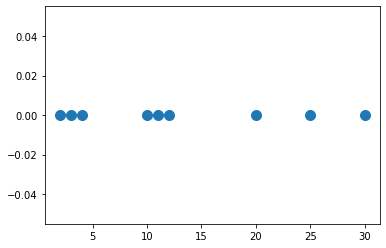

In [9]:
X = np.array([  [2,0], [3,0], [4,0], [10,0], [11,0], [12,0], [20,0], [25,0], [30,0]  ])
plt.scatter(X[:, 0], X[:, 1], s=100)
plt.show()

In [11]:
# k-means 1회차
model1 = KMeans(n_clusters=2, init=np.array([[3,0], [4,0]]), n_init=1, max_iter=1).fit(X)
c0, c1 = model1.cluster_centers_
c0, c1

(array([2.5, 0. ]), array([16.,  0.]))

In [12]:
model1.score(X)

-372.75

In [13]:
def kmeans_df(model, c0, c1):
    df = pd.DataFrame(np.hstack([X,
                                np.linalg.norm(X - c0, axis=1)[:, np.newaxis],
                                np.linalg.norm(X - c0, axis=1)[:, np.newaxis],
                                model.labels_[:, np.newaxis]]),
                     columns=['x0', 'x1', 'd0', 'd1', 'c'])    # x좌표, y좌표, 군집거리1, 군집거리2, 군집번호
    return df

In [14]:
kmeans_df(model1, c0, c1)

,x0,x1,d0,d1,c
0,2.0,0.0,0.5,0.5,0.0
1,3.0,0.0,0.5,0.5,0.0
2,4.0,0.0,1.5,1.5,0.0
3,10.0,0.0,7.5,7.5,1.0
4,11.0,0.0,8.5,8.5,1.0
5,12.0,0.0,9.5,9.5,1.0
6,20.0,0.0,17.5,17.5,1.0
7,25.0,0.0,22.5,22.5,1.0
8,30.0,0.0,27.5,27.5,1.0


In [17]:
def plot_cluster(model, c0, c1):
    plt.scatter(X[model.labels_ == 0, 0],
               X[model.labels_ == 0, 1], s=100, marker='v', c='r')
    plt.scatter(X[model.labels_ == 1, 0],
               X[model.labels_ == 1, 1], s=100, marker='^', c='b')
    plt.scatter(c0[0], c0[1], s=200, c='r')
    plt.scatter(c1[0], c1[1], s=200, c='b')
    plt.show()

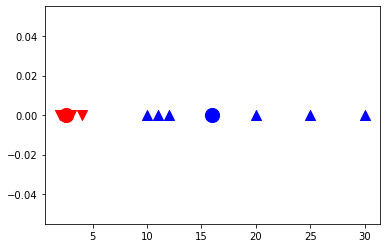

In [18]:
plot_cluster(model1, c0, c1)

[4.75 0.  ] [19.6  0. ]
-267.85499999999996
     x0   x1     d0     d1    c
0   2.0  0.0   2.75   2.75  0.0
1   3.0  0.0   1.75   1.75  0.0
2   4.0  0.0   0.75   0.75  0.0
3  10.0  0.0   5.25   5.25  0.0
4  11.0  0.0   6.25   6.25  0.0
5  12.0  0.0   7.25   7.25  0.0
6  20.0  0.0  15.25  15.25  1.0
7  25.0  0.0  20.25  20.25  1.0
8  30.0  0.0  25.25  25.25  1.0


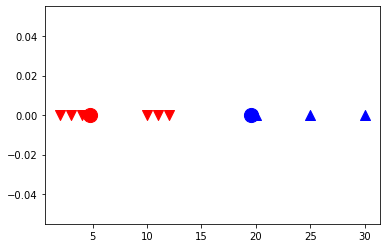

In [19]:
# k-means 3회차
model1 = KMeans(n_clusters=2, init=np.array([[3,0], [18,0]]), n_init=1, max_iter=1).fit(X)
c0, c1 = model1.cluster_centers_

print(c0, c1)
print(model1.score(X))
print(kmeans_df(model1, c0, c1))
plot_cluster(model1, c0, c1)

[7. 0.] [25.  0.]
-150.0
     x0   x1    d0    d1    c
0   2.0  0.0   5.0   5.0  0.0
1   3.0  0.0   4.0   4.0  0.0
2   4.0  0.0   3.0   3.0  0.0
3  10.0  0.0   3.0   3.0  0.0
4  11.0  0.0   4.0   4.0  0.0
5  12.0  0.0   5.0   5.0  0.0
6  20.0  0.0  13.0  13.0  1.0
7  25.0  0.0  18.0  18.0  1.0
8  30.0  0.0  23.0  23.0  1.0


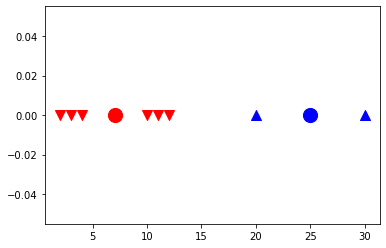

In [23]:
# k-means 5회차
model1 = KMeans(n_clusters=2, init=np.array([[7,0], [25,0]]), n_init=1, max_iter=1).fit(X)
c0, c1 = model1.cluster_centers_

print(c0, c1)
print(model1.score(X))
print(kmeans_df(model1, c0, c1))
plot_cluster(model1, c0, c1)

[25.  0.] [7. 0.]
-150.0
     x0   x1    d0    d1    c
0   2.0  0.0  23.0  23.0  1.0
1   3.0  0.0  22.0  22.0  1.0
2   4.0  0.0  21.0  21.0  1.0
3  10.0  0.0  15.0  15.0  1.0
4  11.0  0.0  14.0  14.0  1.0
5  12.0  0.0  13.0  13.0  1.0
6  20.0  0.0   5.0   5.0  0.0
7  25.0  0.0   0.0   0.0  0.0
8  30.0  0.0   5.0   5.0  0.0


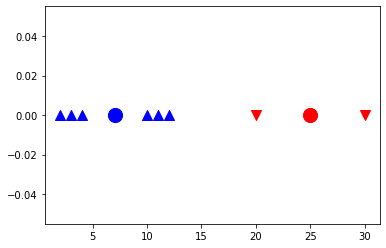

In [20]:
# k-means random
model1 = KMeans(n_clusters=2, init='random', n_init=10, max_iter=100).fit(X)
c0, c1 = model1.cluster_centers_

print(c0, c1)
print(model1.score(X))
print(kmeans_df(model1, c0, c1))
plot_cluster(model1, c0, c1)